In [6]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
import math

import matplotlib.pyplot as plt

In [7]:
# device config
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

In [8]:
# hyper parametrs:
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.01

In [11]:
# MNIST
train_dataset = torchvision.datasets.MNIST(
    root = './mnist_data',
    train = True,
    download = True,
    transform = transforms.ToTensor()
)

test_dataset = torchvision.datasets.MNIST(
    root = './mnist_data',
    train = False,
    transform = transforms.ToTensor()
)

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = False)

In [12]:
examples = iter(train_loader)
samples, labels = examples.next()
print(f"samples shape = {samples.shape}")
print(f"labels shape = {labels.shape}")

samples shape = torch.Size([100, 1, 28, 28])
labels shape = torch.Size([100])


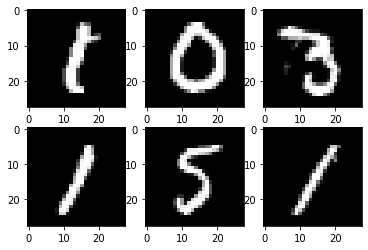

In [14]:
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(samples[i][0], cmap = "gray")
plt.show()

In [35]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        
        return out
    
model = NeuralNet(input_size, hidden_size, num_classes)

In [36]:
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [37]:
# training loop

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward
        predicts = model(images)
        
        #loss
        loss = criterion(predicts, labels)
        
        # gradients
        loss.backward()
        
        # update
        optimizer.step()
        optimizer.zero_grad()
        
        if i%100 ==0 :
            print(f"epoch = {epoch+1}/{num_epochs}, iter_num = {i}/{n_total_steps}, \
                    loss = {loss.item():.3f}")
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        
        for images, labels in test_loader:
            
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            # value, index
            preds = torch.argmax(outputs, 1)
            n_samples += outputs.shape[0]
            n_correct += (preds == labels).sum().item()
        acc = 100.0 * n_correct/n_samples
        print(f"accuracy = {acc}")

epoch = 1/2, iter_num = 0/600,                     loss = 2.322
epoch = 1/2, iter_num = 100/600,                     loss = 0.320
epoch = 1/2, iter_num = 200/600,                     loss = 0.222
epoch = 1/2, iter_num = 300/600,                     loss = 0.316
epoch = 1/2, iter_num = 400/600,                     loss = 0.163
epoch = 1/2, iter_num = 500/600,                     loss = 0.050
accuracy = 95.42
epoch = 2/2, iter_num = 0/600,                     loss = 0.171
epoch = 2/2, iter_num = 100/600,                     loss = 0.081
epoch = 2/2, iter_num = 200/600,                     loss = 0.140
epoch = 2/2, iter_num = 300/600,                     loss = 0.033
epoch = 2/2, iter_num = 400/600,                     loss = 0.191
epoch = 2/2, iter_num = 500/600,                     loss = 0.036
accuracy = 95.85
